In [330]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split

In [331]:
data = pd.read_csv('src\data\weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [332]:
# convert inch 2 cm
data['Height'] = data['Height'] * 2.54

# convert pound 2 kg
data['Weight'] = data['Weight'] / 2.205

# convert Gender 2 Label
data = data.replace(['Male','Female'], [1, 0])

data.head()

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676


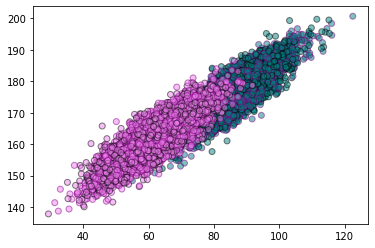

In [333]:
Gender_colors = ['violet','teal']
edge_colors = ['purple', 'k']
plt.scatter(data['Weight'], data['Height'], alpha=0.5, c= data['Gender'], cmap= ListedColormap(Gender_colors), edgecolors= edge_colors)

In [334]:
X_data = np.array([data['Weight'],data['Height']]).T
X_data.shape

Y_data = np.array(data['Gender']).T
Y_data.shape

(10000,)

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size= 0.01, random_state= 5)

In [336]:
class KNearestNeighbors:
  def __init__(self, k):
      self.k = k

  #train
  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  
  def euclideanDistance(self, a, b):
        dis = np.sqrt(np.sum((a - b) ** 2))
        return dis

  def nearNeighbors(self, Xdata):
      dists = []
      for train in self.X_train:
        dist = self.euclideanDistance(train, Xdata)
        dists.append(dist)
      sort_idx = np.argsort(dists)
      sort_target = self.Y_train[sort_idx]
      return sort_target[0: self.k]

  def predict(self, Xdata):
      neighbors = self.nearNeighbors(Xdata)
      predict_result = np.argmax(np.bincount(neighbors))
      return predict_result
  
  def evaluate(self, X_test, Y_test):
    cv_predict = []
    for test in X_test:
      cv = self.predict(test)
      cv_predict.append(cv)
    result_cv = cv_predict - Y_test
    # count zeros in 1d array
    n_zeros = np.count_nonzero(result_cv== 0)
    acc = n_zeros / len(Y_test)
    return acc


In [337]:
result_K = []
for k in range (3,9,2):
  knn = KNearestNeighbors(k)
  knn.fit(X_train, Y_train)
  accuracy = knn.evaluate(X_test, Y_test )
  print(accuracy)
  result_K.append([accuracy, k])
best = max(result_K)
print("best accuracy and best k is : ", best)



0.92
0.95
0.95
best accuracy and best k is :  [0.95, 7]


In [338]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
cv_predict = neigh.predict(X_test)
result_cv = cv_predict - Y_test
# count zeros in 1d array
n_zeros = np.count_nonzero(result_cv== 0)
acc = n_zeros / len(Y_test)
print(acc)

0.95
